In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load data

In [20]:
btc_data = pd.read_csv('bitstampUSD_1-min_data_2019-01-01_to_2019-06-30.csv', index_col='Timestamp', parse_dates=True)
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260640 entries, 2019-01-01 00:00:00 to 2019-06-30 23:59:00
Data columns (total 7 columns):
Open                 247345 non-null float64
High                 247345 non-null float64
Low                  247345 non-null float64
Close                247345 non-null float64
Volume_(BTC)         247345 non-null float64
Volume_(Currency)    247345 non-null float64
Weighted_Price       247345 non-null float64
dtypes: float64(7)
memory usage: 15.9 MB


# fill missing values

## Close

In [26]:
btc_data['Close'] = btc_data['Close'].fillna(method='ffill') # Close
btc_data['Open'] = btc_data['Open'].fillna(btc_data['Close']) # Open
btc_data['Volume_(BTC)'] = btc_data['Volume_(BTC)'].fillna(0) # Volume_(BTC)
btc_data['Volume_(Currency)'] = btc_data['Volume_(Currency)'].fillna(0) # Volume_(Currency)
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260640 entries, 2019-01-01 00:00:00 to 2019-06-30 23:59:00
Data columns (total 7 columns):
Open                 260640 non-null float64
High                 247345 non-null float64
Low                  247345 non-null float64
Close                260640 non-null float64
Volume_(BTC)         260640 non-null float64
Volume_(Currency)    260640 non-null float64
Weighted_Price       247345 non-null float64
dtypes: float64(7)
memory usage: 15.9 MB


# plot price

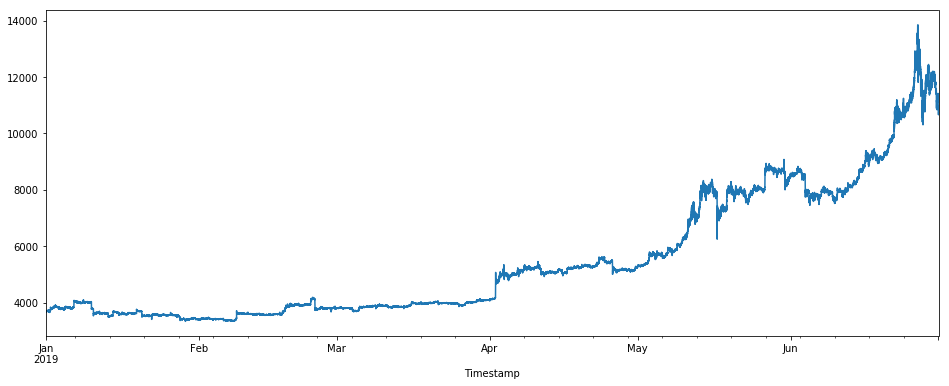

In [27]:
btc_data['Close'].plot(figsize=(16,6))

# rolling return distributions

## 1-minute

count    260639.000000
mean          0.000005
std           0.001051
min          -0.031645
25%          -0.000333
50%           0.000000
75%           0.000356
max           0.105122
Name: Close, dtype: float64

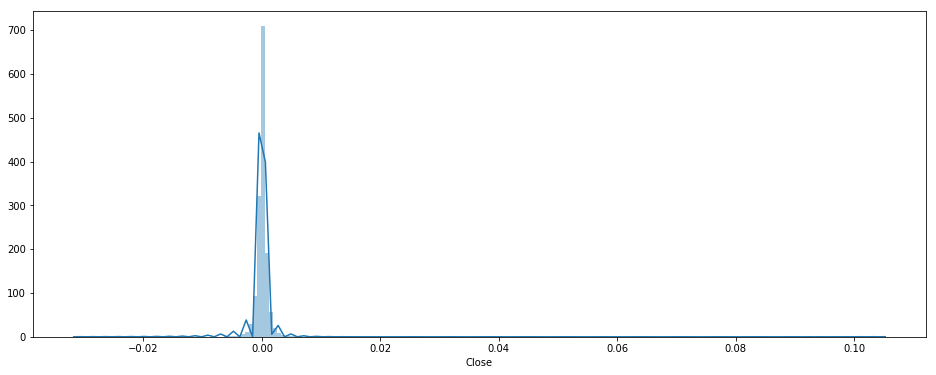

In [48]:
plt.figure(figsize=(16, 6))
rtn = (btc_data['Close'].shift(-1)/btc_data['Close']-1).dropna()
sns.distplot(rtn, bins=200)
rtn.describe()

## 5-minute

count    260635.000000
mean          0.000023
std           0.002258
min          -0.094556
25%          -0.000674
50%           0.000019
75%           0.000727
max           0.080455
Name: Close, dtype: float64

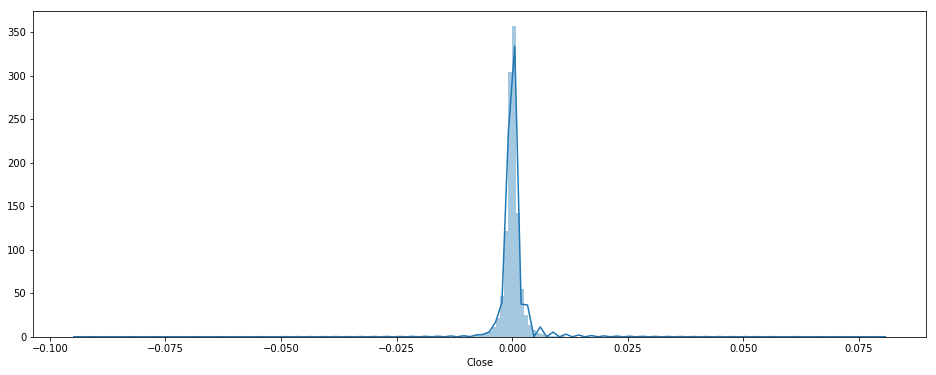

In [49]:
plt.figure(figsize=(16, 6))
rtn = (btc_data['Close'].shift(-5)/btc_data['Close']-1).dropna()
sns.distplot(rtn, bins=200)
rtn.describe()

## 10-minute

count    260630.000000
mean          0.000046
std           0.003186
min          -0.159961
25%          -0.000889
50%           0.000044
75%           0.000984
max           0.140960
Name: Close, dtype: float64

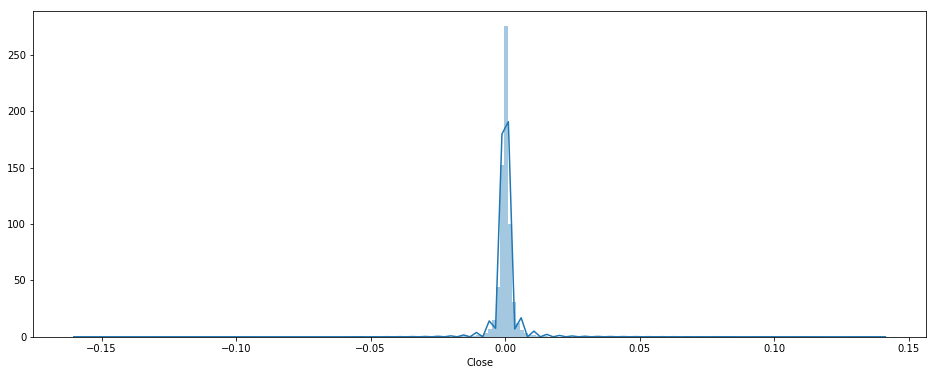

In [50]:
plt.figure(figsize=(16, 6))
rtn = (btc_data['Close'].shift(-10)/btc_data['Close']-1).dropna()
sns.distplot(rtn, bins=200)
rtn.describe()

From the 1-minute, 5-minute and 10-minute return distribution plots above, it seems that the skewness (unbalance) is decreasing with longer time intevals.

## investigate how skewness of return distributions changes with time intevals

,Skewness,Median
1,2.899766,0.000000
2,0.441720,0.000000
3,-0.536872,0.000002
4,-1.347712,0.000003
5,-2.027354,0.000004
6,-2.282552,0.000004
7,-2.405192,0.000005
8,-2.441832,0.000005
9,-2.504207,0.000005
10,-2.637382,0.000004


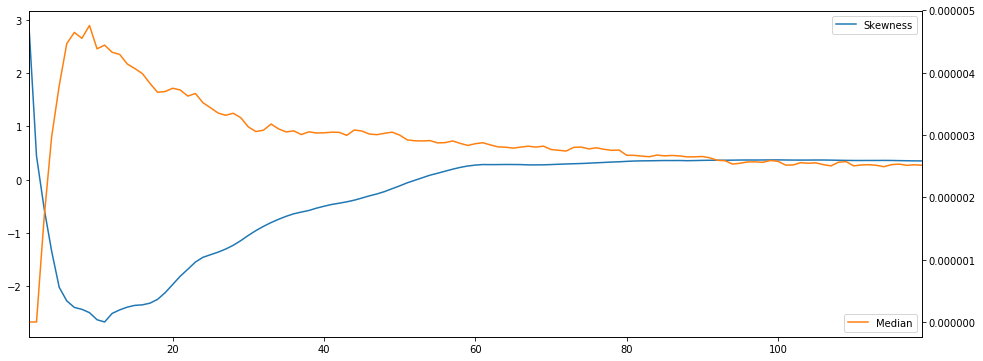

In [77]:
skew_df = pd.DataFrame()
for i in range(1, 120):
    rtn = (btc_data['Close'].shift(-i)/btc_data['Close']-1).dropna()
    skew_df.loc[i, 'Skewness'] = rtn.skew()
    skew_df.loc[i, 'Median'] = (1+rtn.median())**(1/i)-1
skew_df['Skewness'].plot(figsize=(16, 6))
plt.legend(loc=1)
skew_df['Median'].plot(secondary_y=True)
plt.legend(loc=4)
skew_df.head(30)

I think above is an interesting plot. The skewness and median of the return distributions show opposite "trends" in the beginning and start to stablize around 60-minute. We will take a further look at sub-20-minute intervals.